In [1]:
# %pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CoCoRaHs_Reg4.csv", parse_dates=["DATE"])
df.set_index('DATE',inplace=True)
print(df.describe())

            LATITUDE      LONGITUDE      ELEVATION           PRCP  \
count  691683.000000  691683.000000  691683.000000  249033.000000   
mean       40.614650    -123.149282     665.203173       0.179896   
std         0.957032       0.594506     538.058815       0.470019   
min        38.508471    -124.281608       0.000000       0.000000   
25%        39.927800    -123.603600     152.400000       0.000000   
50%        40.710884    -123.083300     579.100000       0.000000   
75%        41.307500    -122.696700    1088.100000       0.100000   
max        42.080000    -122.144700    1844.000000      12.410000   

                TMAX           TMIN  
count  461946.000000  461938.000000  
mean       67.022782      43.772602  
std        22.415863      14.107114  
min      -100.000000    -100.000000  
25%        52.000000      35.000000  
50%        66.000000      43.000000  
75%        82.000000      52.000000  
max      4177.000000    4177.000000  


In [3]:
P1 = df.pivot_table(df,'STATION',aggfunc=np.max)

In [4]:
#df.loc[df.TMIN > 90, 'TMIN'] = np.nan
df.loc[df.TMAX > 121, 'TMAX'] = np.nan

In [5]:
#df.loc[df.TMIN < -20, 'TMIN'] = np.nan
df.loc[df.TMAX < 0 , 'TMAX'] = np.nan
#P1 = pd.pivot_table(df, values='TMIN',index=['DATE'], columns=['STATION'])
P1 = pd.pivot_table(df, values='TMAX',index=['DATE'], columns=['STATION'])
print(P1)

STATION     USR0000CABS  USR0000CALD  USR0000CAPT  USR0000CBAC  USR0000CBBR  \
DATE                                                                          
1985-01-23          NaN          NaN          NaN          NaN          NaN   
1985-01-24          NaN          NaN          NaN          NaN          NaN   
1985-01-25          NaN          NaN          NaN          NaN          NaN   
1985-01-26          NaN          NaN          NaN          NaN          NaN   
1985-01-28          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2020-03-18         43.0         34.0         56.0         40.0         55.0   
2020-03-19         52.0         46.0         63.0         48.0         64.0   
2020-03-20         56.0         49.0         64.0         52.0         67.0   
2020-03-21         63.0         56.0         70.0         57.0         73.0   
2020-03-22         59.0         54.0         60.0   

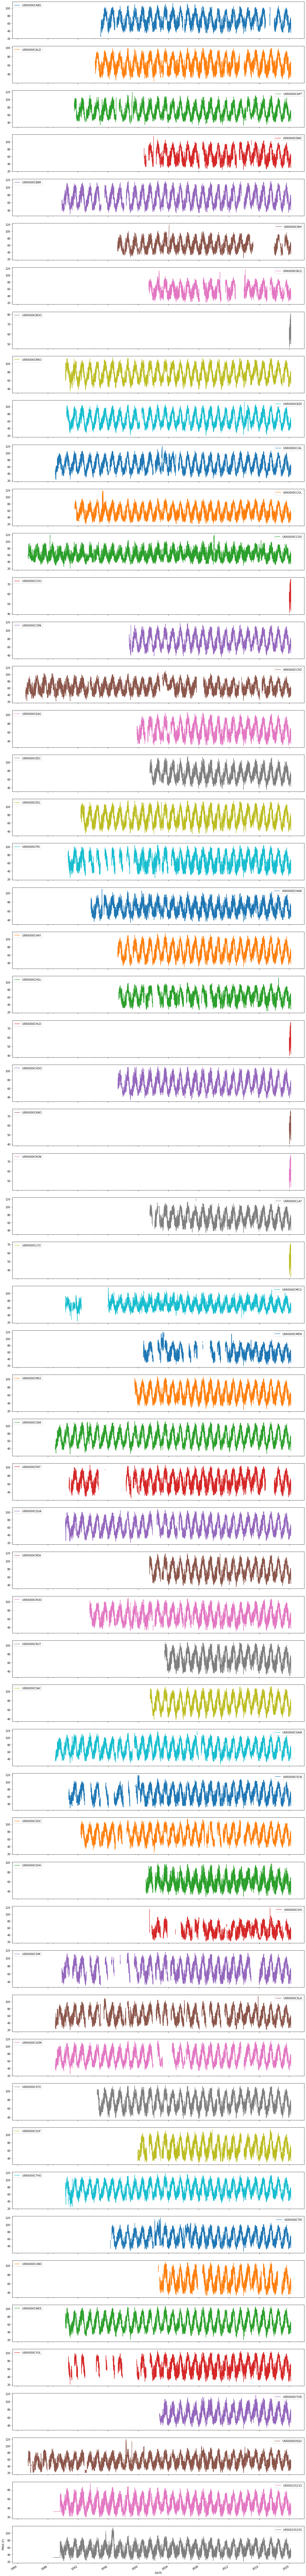

In [6]:
from matplotlib import pyplot
P1.plot(subplots=True,figsize=(20, 200))
#plt.ylabel("TMIN (F)")
plt.ylabel("TMAX (F)")
pyplot.show()

In [7]:
results= P1
#results.to_csv("reg4_tmin_no_spikes.csv")
results.to_csv("reg4_tmax_no_spikes.csv")

In [ ]:
P2 = pd.pivot_table(df, values='PRCP',index=['DATE'], columns=['STATION'])

In [ ]:
from matplotlib import pyplot
P1.plot(subplots=True,figsize=(20, 200))
plt.ylabel("Precipitaion (mm)")
pyplot.show()

In [ ]:
result= P2
result.to_csv("reg4_ppt.csv")